# Instalar e Importar Dependências

In [1]:
# Instalar e importar as dependências necessárias para o projeto, incluindo PyTorch, Torchvision e Torchaudio.
# Aqui estamos utilizando o comando pip para instalar as bibliotecas torch, torchvision e torchaudio.
# Essas bibliotecas são essenciais para trabalhar com redes neurais profundas e visão computacional.
# O parâmetro --index-url especifica o índice de onde os pacotes serão baixados.
# Caso você esteja utilizando uma GPU diferente, pode ser necessário alterar a URL para a versão correta do CUDA.
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Se necessárias para o projeto.
# Clonar o repositório YOLOv5 do GitHub.
# O YOLOv5 é uma das arquiteturas mais populares para detecção de objetos em tempo real.
# Clonando o repositório, teremos acesso ao código e aos modelos pré-treinados.
# !git clone https://github.com/ultralytics/yolov5

# Se necessárias para o projeto.
# Instalar as dependências listadas no arquivo requirements.txt do repositório YOLOv5.
# Essas dependências incluem bibliotecas adicionais necessárias para o funcionamento do YOLOv5.
# O comando cd yolov5 navega até o diretório clonado e pip install -r requirements.txt instala as dependências.
!cd yolov5 & pip install -r requirements.txt

# Importar as bibliotecas necessárias para o projeto.
# torch: Biblioteca principal do PyTorch para criação e treinamento de modelos de aprendizado profundo.
# matplotlib.pyplot: Biblioteca para criação de gráficos e visualização de dados.
# numpy: Biblioteca para manipulação de arrays e operações matemáticas.
# cv2: Biblioteca OpenCV para processamento de imagens e vídeos.
# os: Biblioteca para interagir com o sistema operacional, como manipulação de arquivos e diretórios.
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importar Bibliotecas Necessárias

In [2]:
# Importar as bibliotecas necessárias para o projeto.
# torch: Biblioteca principal do PyTorch para criação e treinamento de modelos de aprendizado profundo.
# matplotlib.pyplot: Biblioteca para criação de gráficos e visualização de dados.
# numpy: Biblioteca para manipulação de arrays e operações matemáticas.
# cv2: Biblioteca OpenCV para processamento de imagens e vídeos.
# os: Biblioteca para interagir com o sistema operacional, como manipulação de arquivos e diretórios.
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

# Treinar o Modelo do Zero

In [ ]:
# Treinar o modelo YOLOv5 do zero usando um conjunto de dados personalizado.
# Aqui estamos utilizando o comando para treinar o modelo YOLOv5.
# O parâmetro --img especifica o tamanho das imagens de entrada.
# O parâmetro --batch define o tamanho do lote para o treinamento.
# O parâmetro --epochs define o número de épocas para o treinamento.
# O parâmetro --data especifica o arquivo de configuração do conjunto de dados.
# O parâmetro --workers define o número de trabalhadores para carregar os dados.
# Você pode ajustar esses parâmetros conforme necessário para melhorar o desempenho ou adaptar às suas necessidades.
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --workers 2

# Carregar Modelo Personalizado

In [3]:
# Carregar o modelo YOLOv5 personalizado treinado a partir do caminho especificado.
# Aqui estamos utilizando a função torch.hub.load para carregar um modelo YOLOv5 personalizado.
# O parâmetro 'ultralytics/yolov5' especifica o repositório do modelo.
# O parâmetro 'custom' indica que estamos carregando um modelo personalizado.
# O parâmetro path define o caminho para o arquivo de pesos do modelo treinado.
# O parâmetro force_reload=True força o recarregamento do modelo, garantindo que estamos utilizando a versão mais recente.
# Caso você tenha treinado o modelo em um caminho diferente, altere o valor do parâmetro path para o caminho correto.
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Guilherme/.cache\torch\hub\master.zip
YOLOv5  2025-3-12 Python-3.12.3 torch-2.5.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Carregar Imagem de Teste

In [10]:
# Carregar uma imagem de teste para realizar a detecção de objetos.
# Aqui estamos utilizando a função os.path.join para construir o caminho completo da imagem de teste.
# A imagem será carregada a partir do diretório 'data/test/images'.
# Você pode substituir o nome do arquivo de imagem pelo nome da sua imagem de teste.
# Certifique-se de que a imagem esteja no diretório especificado ou ajuste o caminho conforme necessário.
img = os.path.join('img_test.jpg')

# Obter Resultados do Modelo


In [11]:
# Obter os resultados da detecção de objetos na imagem de teste usando o modelo carregado.
# Aqui estamos utilizando o modelo YOLOv5 carregado para realizar a detecção de objetos na imagem de teste.
# A função model(img) processa a imagem e retorna os resultados da detecção.
# Você pode ajustar os parâmetros do modelo ou da imagem conforme necessário para melhorar a precisão ou o desempenho.
results = model(img)

# Exibir Resultados


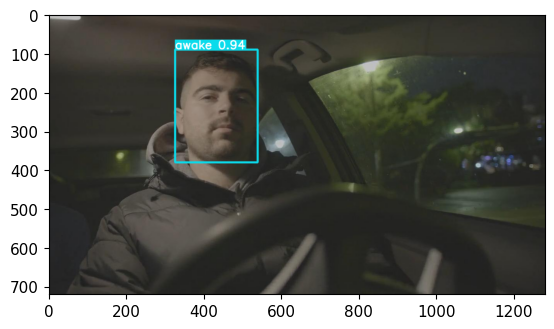

In [12]:
# Exibir os resultados da detecção de objetos na imagem de teste usando Matplotlib.
# Aqui estamos utilizando a função %matplotlib inline para garantir que os gráficos sejam exibidos diretamente no notebook.
# A função plt.imshow é utilizada para exibir a imagem com os resultados da detecção.
# A função np.squeeze é utilizada para remover dimensões de tamanho 1 do array, se necessário.
# A função results.render() retorna a imagem com as detecções desenhadas sobre ela.
# A função plt.show() exibe a imagem no notebook.
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Inicializar e Processar Vídeo da Câmera


In [9]:
# Inicializar a câmera e processar o vídeo em tempo real para detecção de sonolência usando o modelo YOLOv5.
# Aqui estamos utilizando a biblioteca OpenCV para capturar o vídeo da câmera.
# O índice 1 no cv2.VideoCapture(1) pode ser alterado para 0 ou outro número, dependendo da sua configuração de câmera.
# O loop while cap.isOpened() continua enquanto a câmera estiver aberta.
# A função cap.read() captura um quadro do vídeo. Se não conseguir capturar, imprime uma mensagem de erro e sai do loop.
# O quadro capturado é rotacionado 90 graus no sentido horário usando cv2.rotate.
# O modelo YOLOv5 é utilizado para processar o quadro rotacionado e detectar objetos.
# A função results.render() desenha as detecções no quadro.
# O quadro processado é exibido em uma janela usando cv2.imshow.
# O loop é interrompido se a tecla 'q' for pressionada.
# No final, a câmera é liberada e todas as janelas OpenCV são fechadas.

cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Erro ao capturar o quadro.")
        break

    rotated_frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    results = model(rotated_frame)
    rendered_frame = np.squeeze(results.render())
    cv2.imshow('YOLO', rendered_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_

KeyboardInterrupt: 